# Hierarchical Clustering

## Objetivo

*   Aprender a usar o algoritmo do Hierachical do Scikit-learn


In [31]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

np.random.seed(0)

In [32]:
df = pd.read_excel("https://github.com/EduPekUfpr/PPGOLD7037/raw/main/Data/Cluster01.xlsx")

## Hierarchical Aglomerative

Nós Usaremos 3 parâmetros para o Hierarchical:

* n_clusters: 5 Número de CLusters
* linkage: como calcular a distância entre os pontos


In [33]:
import pylab
import scipy.cluster.hierarchy

HierarchicalAglo = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [34]:
HierarchicalAglo.fit(df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [35]:
Hier_labels = HierarchicalAglo.labels_

df_cluster = df.copy()
df_cluster["cluster"] = Hier_labels
UniqueLabels = df_cluster["cluster"].unique()

UniqueLabels

array([3, 2, 1, 0])

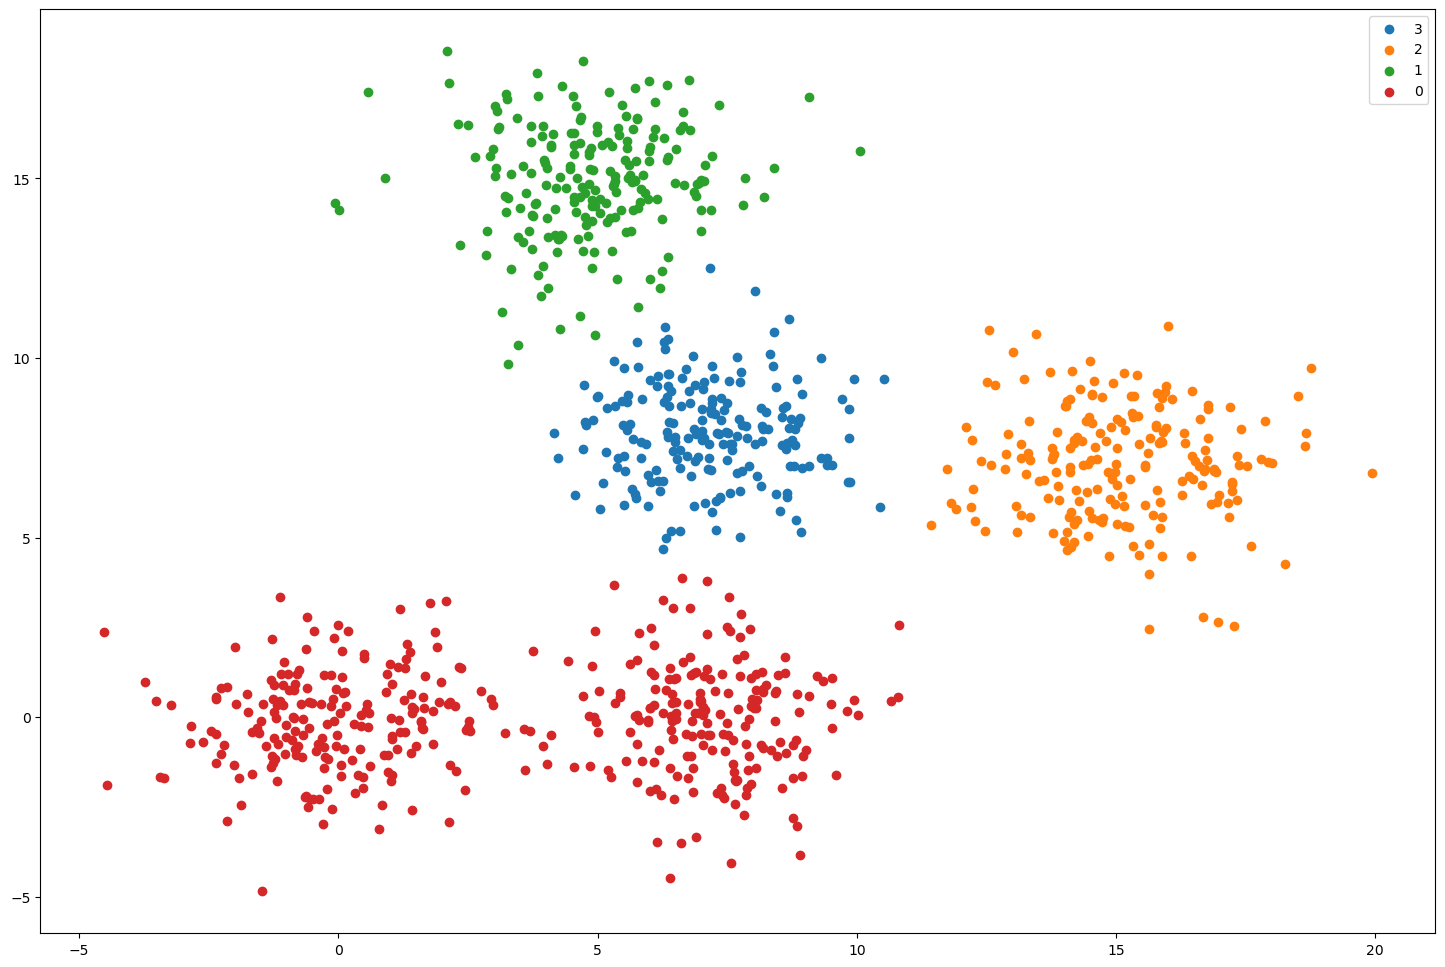

In [36]:
plt.figure(figsize=(18, 12))
for i in UniqueLabels:
    plt.scatter(df.loc[df_cluster['cluster'] == i, ['X']] , df.loc[df_cluster['cluster'] == i, ['Y']] , label = i)
plt.legend()
plt.show()

## Dendograma

In [37]:
dist_matrix = distance_matrix(df,df) 
print(dist_matrix)

[[ 0.          2.11214537 10.25169253 ... 11.00121348 11.31358284
   2.7016695 ]
 [ 2.11214537  0.          8.19237265 ... 11.62405207 12.01336455
   4.21542989]
 [10.25169253  8.19237265  0.         ... 17.76975358 18.27989174
  12.26120357]
 ...
 [11.00121348 11.62405207 17.76975358 ...  0.          0.56392543
   8.50891864]
 [11.31358284 12.01336455 18.27989174 ...  0.56392543  0.
   8.77287303]
 [ 2.7016695   4.21542989 12.26120357 ...  8.50891864  8.77287303
   0.        ]]


/var/folders/fr/1byq_zn551q9hcfd9_hhlv5h0000gn/T/ipykernel_30196/2471224358.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


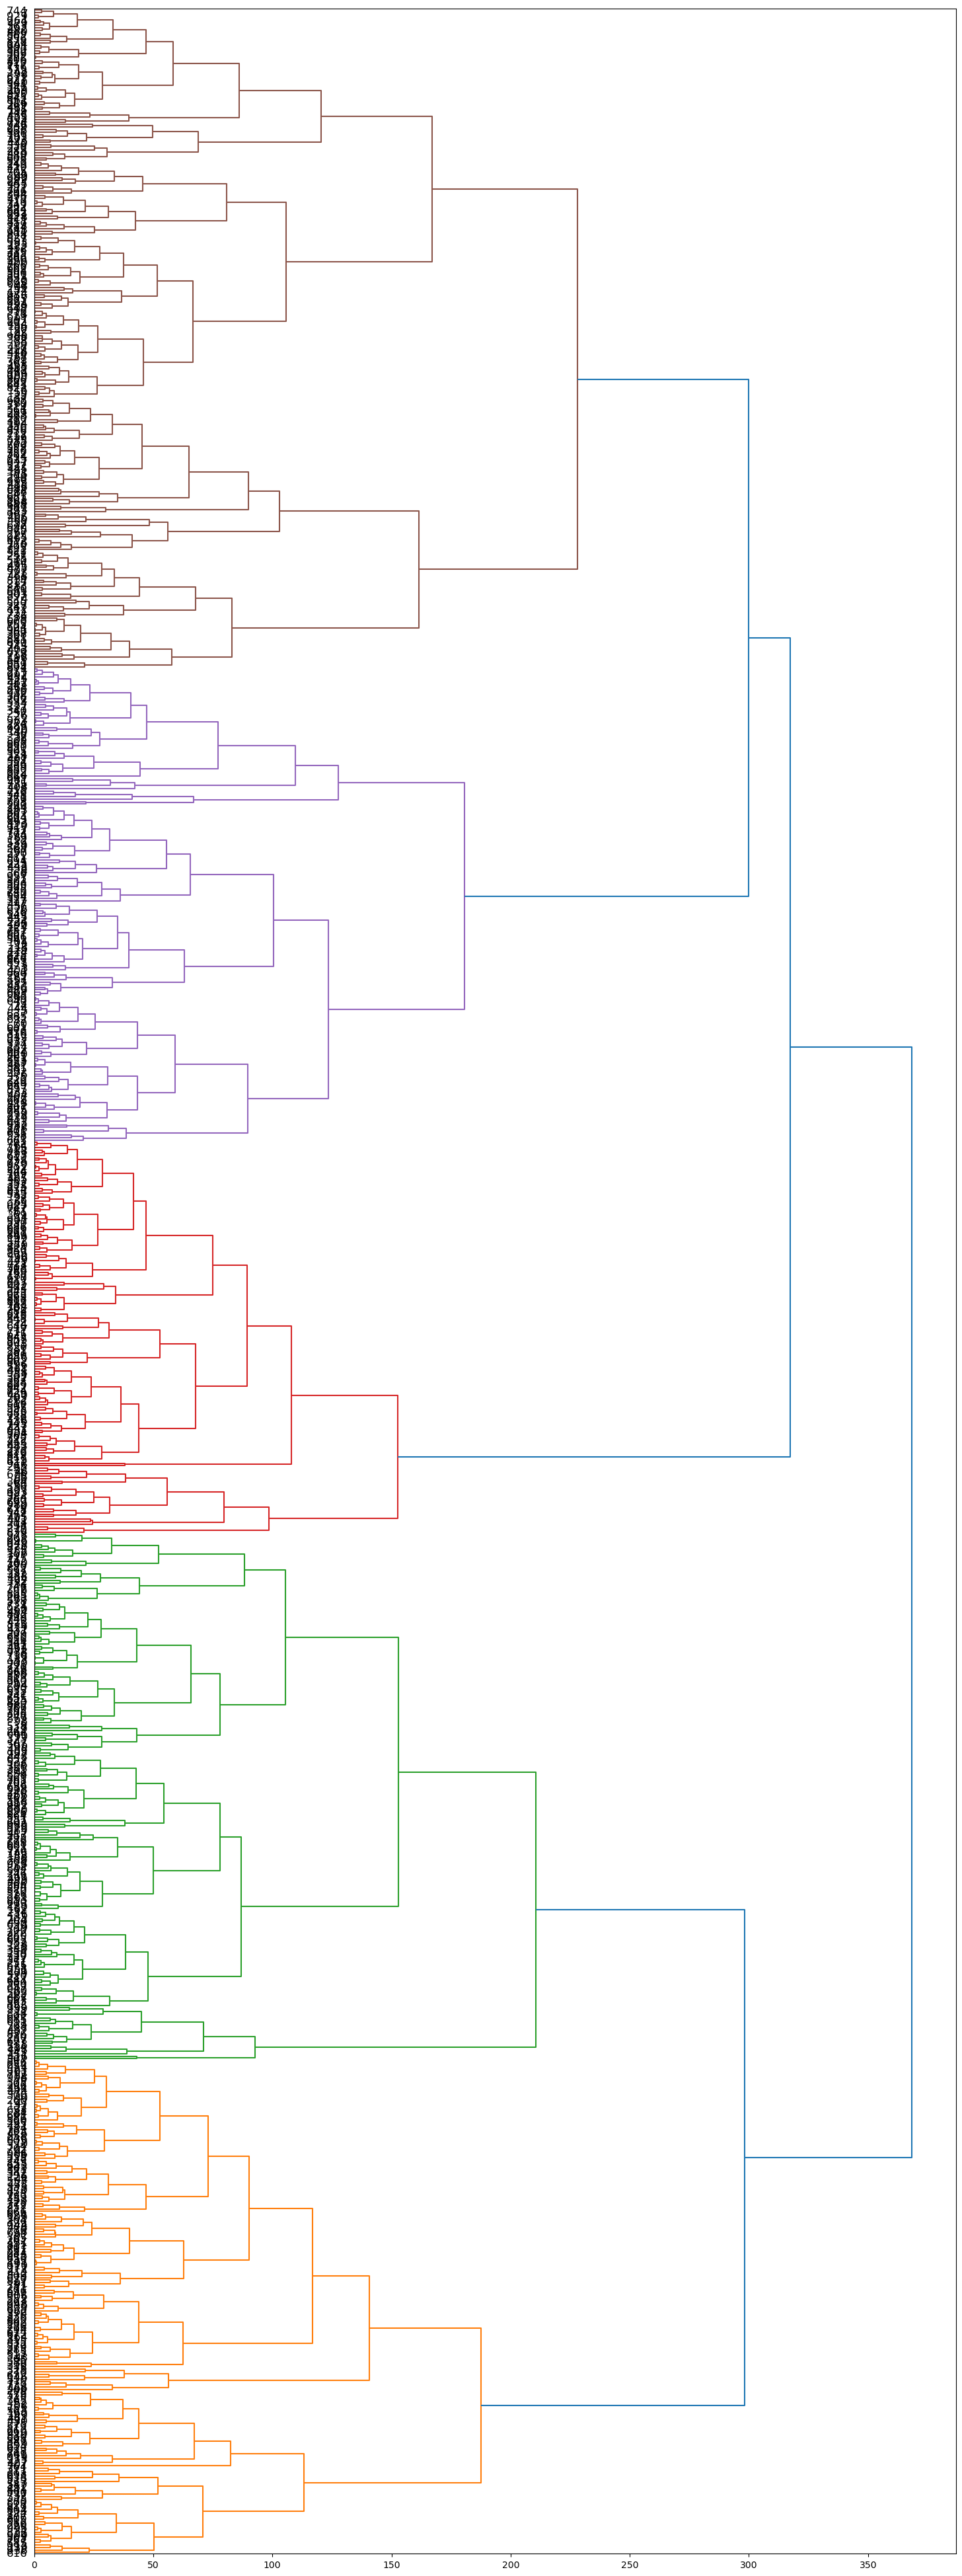

In [38]:
Z = hierarchy.linkage(dist_matrix, 'complete')
fig = pylab.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z, leaf_font_size =12, orientation = 'right')